## Importing Essential Libraries and Modules

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Defining Cache Directories

In [2]:
np_cache_dir = os.path.join('.', 'numpy_cache')
csv_cache_dir = os.path.join('.', 'csv_cache')

### Reading - and Presenting - the Data
* Vinho Verde Red Wine; Normalized; Outlier-Free

In [3]:
rn_wine = pd.read_csv(os.path.join(csv_cache_dir, 'red_clean.csv'), sep='\t').drop(['Unnamed: 0'], axis=1)
rn_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
rn_wine_X = np.load(os.path.join(np_cache_dir, 'red_clean_X_normed.npy'))
rn_wine_y = np.load(os.path.join(np_cache_dir, 'red_clean_y.npy'))

## Plot The Correlation Heatmap (just to eyeball the best features)

In [5]:
correlation = pd.DataFrame(rn_wine).corr()

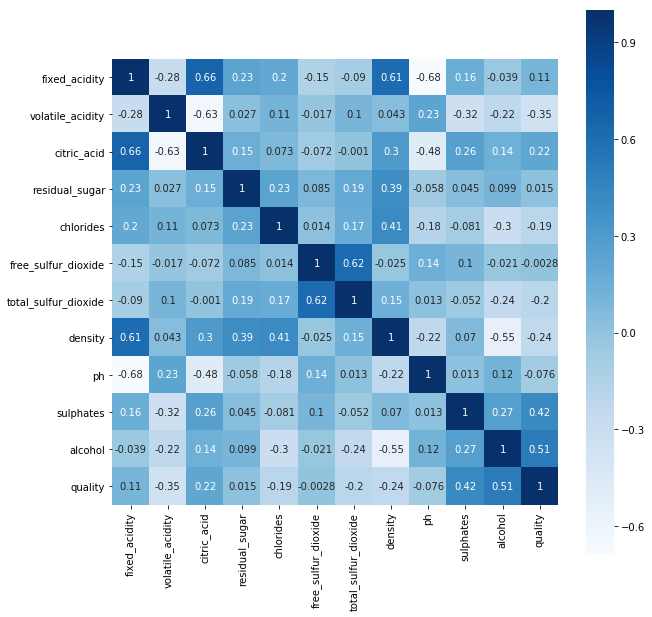

In [6]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

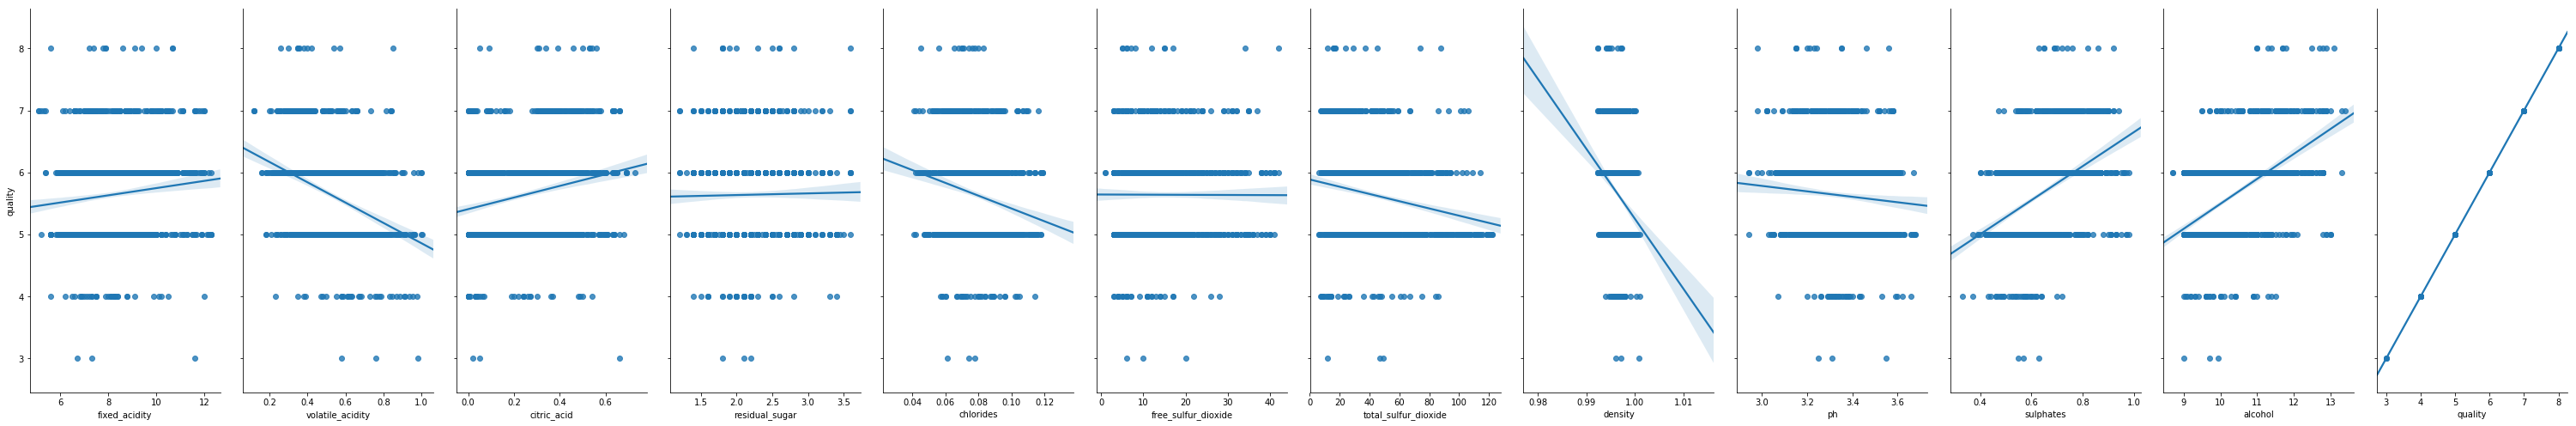

In [7]:
sns.pairplot(rn_wine, x_vars=rn_wine.columns,y_vars='quality',kind='reg',size=7,aspect=0.5)

## Cross Validation
#### Split our Dataset into 80/20 partition (80% Train / 20% Testing)

In [8]:
from tqdm import tqdm,tqdm_notebook
from sklearn.model_selection import RepeatedKFold

In [9]:
# x_train, x_test, y_train, y_test = train_test_split(rn_wine_X, rn_wine_y, 
#                                                     train_size=0.8, test_size=0.2, random_state=0)
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=100)

## Logistic Regression
* View the accuracy of regression having all features predict the rating value

In [10]:
regressor = LogisticRegression(solver='newton-cg', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X)):
    x_train, x_test = rn_wine_X[train_index], rn_wine_X[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    regressor.fit(x_train,y_train)
    accuracy = regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 56%
Accuracy: 58%
Accuracy: 59%
Accuracy: 59%
Accuracy: 67%
Accuracy: 57%
Accuracy: 56%
Accuracy: 62%
Accuracy: 63%
Accuracy: 63%
Accuracy: 58%
Accuracy: 64%
Accuracy: 54%
Accuracy: 60%
Accuracy: 64%
Accuracy: 57%
Accuracy: 57%
Accuracy: 61%
Accuracy: 64%
Accuracy: 62%
Accuracy: 60%
Accuracy: 55%
Accuracy: 59%
Accuracy: 62%
Accuracy: 62%



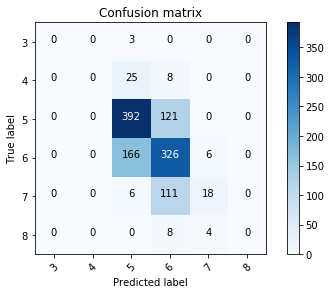

In [13]:
# make the predictions (y_hat) for the whole dataset
y_hat = regressor.predict(rn_wine_X)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

## k-Nearest Neighbors
* View the accuracy of regression having all features predict the rating value

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='minkowski', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X)):
    x_train, x_test = rn_wine_X[train_index], rn_wine_X[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    knn_regressor.fit(x_train,y_train)
    accuracy = knn_regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 72%
Accuracy: 64%
Accuracy: 69%
Accuracy: 67%
Accuracy: 68%
Accuracy: 73%
Accuracy: 66%
Accuracy: 61%
Accuracy: 69%
Accuracy: 66%
Accuracy: 64%
Accuracy: 69%
Accuracy: 64%
Accuracy: 70%
Accuracy: 69%
Accuracy: 69%
Accuracy: 65%
Accuracy: 65%
Accuracy: 69%
Accuracy: 66%
Accuracy: 68%
Accuracy: 62%
Accuracy: 69%
Accuracy: 65%
Accuracy: 72%



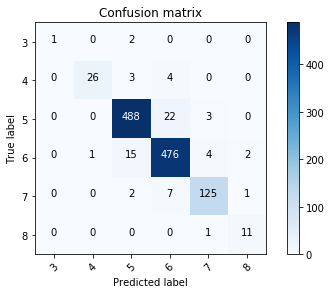

In [15]:
# make the predictions (y_hat) for the whole dataset
y_hat = knn_classifier.predict(rn_wine_X)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

## Increasing Prediction Accuracy Using Feature Selection
#### By using Feature Selection we (theoretically):
* Reduce Overfitting
* Improve the Accuracy of the used Predictor
* Reduces the Training Time (as we now train on a portion of the samples)

### Feature Selection using Univariate Selection (/w chi squared Evaluation Function)

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
# feature extraction
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(rn_wine_X, rn_wine_y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 1.836 11.757 12.11   0.165  3.673  2.518 12.973  5.123  0.777 14.627
 41.212]


In [48]:
[(list(rn_wine)[i], fit.scores_[i]) for i in range(len(fit.scores_))]

[('fixed_acidity', 1.8357119765974401),
 ('volatile_acidity', 11.75687486928301),
 ('citric_acid', 12.11046328925077),
 ('residual_sugar', 0.16497919929142701),
 ('chlorides', 3.6733692829859854),
 ('free_sulfur_dioxide', 2.5178165905689553),
 ('total_sulfur_dioxide', 12.973265656577839),
 ('density', 5.122834707404034),
 ('ph', 0.7770497708862234),
 ('sulphates', 14.627042946668888),
 ('alcohol', 41.21221748858245)]

##### Seeing the above result we estimate that 5 features are useful to our model
* volatile_acidity
* citric_acid
* total_sulfur_dioxide
* sulphates
* alcohol

### Feature Selection using Feature Importance (/w ExtraTreesClassifier)
* Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(rn_wine_X, rn_wine_y)

# summarize scores
print(model.feature_importances_)

[0.078 0.096 0.079 0.068 0.084 0.075 0.099 0.083 0.079 0.114 0.146]


In [54]:
[(list(rn_wine)[i], model.feature_importances_[i]) for i in range(len(model.feature_importances_))]

[('fixed_acidity', 0.07770647265911754),
 ('volatile_acidity', 0.0963300094958895),
 ('citric_acid', 0.0791108111638937),
 ('residual_sugar', 0.06753983950958645),
 ('chlorides', 0.08437115596574876),
 ('free_sulfur_dioxide', 0.0745022055779276),
 ('total_sulfur_dioxide', 0.09884927989772488),
 ('density', 0.08262763609756937),
 ('ph', 0.07859486906624759),
 ('sulphates', 0.11441418837329154),
 ('alcohol', 0.14595353219300314)]

##### Seeing the above result we estimate that 4 features are useful to our model
* volatile_acidity
* total_sulfur_dioxide
* sulphates
* alcohol

### Training with 5 features (SelectKBest Result)
* Transform the Dataset; Train; Compute Accuracy and Confusion Matrices
* Logistic Regression

In [75]:
# Feature Extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(rn_wine_X, rn_wine_y)

# Transform the Dataset
rn_wine_X5 = fit.transform(rn_wine_X)

In [66]:
regressor = LogisticRegression(solver='newton-cg', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X5), total=rkf.get_n_splits()):
    x_train, x_test = rn_wine_X5[train_index], rn_wine_X5[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    regressor.fit(x_train,y_train)
    accuracy = regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

Exception in thread Thread-1658:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\ProgramData\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Accuracy: 56%
Accuracy: 60%
Accuracy: 62%
Accuracy: 58%
Accuracy: 64%
Accuracy: 56%
Accuracy: 56%
Accuracy: 62%
Accuracy: 61%
Accuracy: 64%
Accuracy: 60%
Accuracy: 62%
Accuracy: 50%
Accuracy: 61%
Accuracy: 63%
Accuracy: 56%
Accuracy: 58%
Accuracy: 59%
Accuracy: 62%
Accuracy: 61%
Accuracy: 59%
Accuracy: 55%
Accuracy: 59%
Accuracy: 62%
Accuracy: 61%



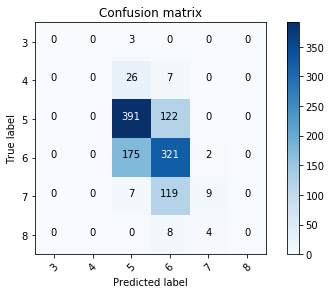

In [68]:
# make the predictions (y_hat) for the whole dataset
y_hat = regressor.predict(rn_wine_X5)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

* k-Nearest Neighbor Classifier

In [83]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='minkowski', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X5)):
    x_train, x_test = rn_wine_X5[train_index], rn_wine_X5[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    knn_classifier.fit(x_train,y_train)
    accuracy = knn_regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 67%
Accuracy: 64%
Accuracy: 64%
Accuracy: 64%
Accuracy: 70%
Accuracy: 67%
Accuracy: 63%
Accuracy: 64%
Accuracy: 69%
Accuracy: 68%
Accuracy: 65%
Accuracy: 72%
Accuracy: 65%
Accuracy: 74%
Accuracy: 66%
Accuracy: 68%
Accuracy: 69%
Accuracy: 61%
Accuracy: 70%
Accuracy: 67%
Accuracy: 69%
Accuracy: 64%
Accuracy: 63%
Accuracy: 70%
Accuracy: 64%



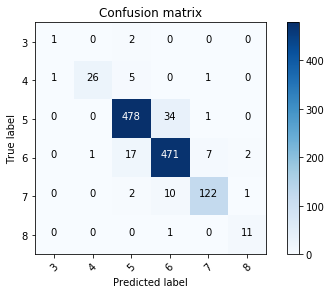

In [85]:
# make the predictions (y_hat) for the whole dataset
y_hat = knn_classifier.predict(rn_wine_X5)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

### Training with 4 features (ExtraTreesClassifier Result)
* Transform the Dataset; Train; Compute Accuracy and Confusion Matrices

In [72]:
# Transform the Dataset 1 6 9 10
usefulFeatures = [False, True, False, False, False, False, True, False, False, True, True]
rn_wine_X4 = rn_wine_X[:,usefulFeatures]

In [87]:
regressor = LogisticRegression(solver='newton-cg', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X4), total=rkf.get_n_splits()):
    x_train, x_test = rn_wine_X4[train_index], rn_wine_X4[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    regressor.fit(x_train,y_train)
    accuracy = regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

Accuracy: 55%
Accuracy: 57%
Accuracy: 61%
Accuracy: 58%
Accuracy: 63%
Accuracy: 57%
Accuracy: 56%
Accuracy: 60%
Accuracy: 61%
Accuracy: 61%
Accuracy: 61%
Accuracy: 62%
Accuracy: 50%
Accuracy: 64%
Accuracy: 61%
Accuracy: 56%
Accuracy: 57%
Accuracy: 60%
Accuracy: 62%
Accuracy: 61%
Accuracy: 59%
Accuracy: 55%
Accuracy: 60%
Accuracy: 60%
Accuracy: 59%



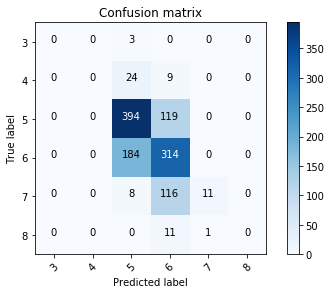

In [88]:
# make the predictions (y_hat) for the whole dataset
y_hat = regressor.predict(rn_wine_X4)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

* k-Nearest Neighbor Classifier

In [142]:
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', p=2, metric='minkowski', n_jobs=-1)
for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X4)):
    x_train, x_test = rn_wine_X4[train_index], rn_wine_X4[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    knn_classifier.fit(x_train,y_train)
    accuracy = knn_classifier.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 71%
Accuracy: 69%
Accuracy: 67%
Accuracy: 69%
Accuracy: 74%
Accuracy: 71%
Accuracy: 68%
Accuracy: 65%
Accuracy: 73%
Accuracy: 73%
Accuracy: 66%
Accuracy: 74%
Accuracy: 69%
Accuracy: 74%
Accuracy: 68%
Accuracy: 70%
Accuracy: 73%
Accuracy: 64%
Accuracy: 73%
Accuracy: 71%
Accuracy: 72%
Accuracy: 63%
Accuracy: 66%
Accuracy: 75%
Accuracy: 70%



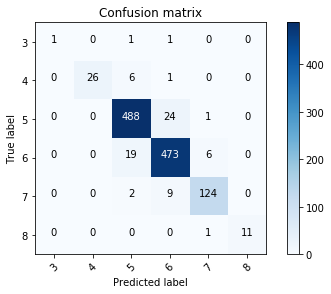

In [143]:
# make the predictions (y_hat) for the whole dataset
y_hat = knn_classifier.predict(rn_wine_X4)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

### Training /w 5 Features over PCA

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) #2-dimensional PCA transformation
X_pca = pd.DataFrame(pca.fit_transform(rn_wine_X))
X_pca_np = X_pca.values

* Logistic Regressor

In [114]:
regressor = LogisticRegression(solver='newton-cg', n_jobs=-1)

for train_index, test_index in tqdm_notebook(rkf.split(X_pca_np), total=rkf.get_n_splits()):
    x_train, x_test = X_pca_np[train_index], X_pca_np[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    
    regressor.fit(x_train,y_train)

    accuracy = regressor.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

Accuracy: 55%
Accuracy: 59%
Accuracy: 62%
Accuracy: 59%
Accuracy: 59%
Accuracy: 56%
Accuracy: 57%
Accuracy: 60%
Accuracy: 59%
Accuracy: 63%
Accuracy: 60%
Accuracy: 60%
Accuracy: 51%
Accuracy: 62%
Accuracy: 59%
Accuracy: 58%
Accuracy: 58%
Accuracy: 60%
Accuracy: 60%
Accuracy: 57%
Accuracy: 57%
Accuracy: 55%
Accuracy: 62%
Accuracy: 59%
Accuracy: 60%



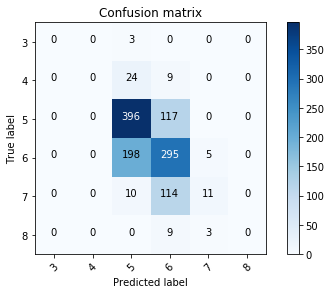

In [116]:
# make the predictions (y_hat) for the whole dataset
y_hat = regressor.predict(X_pca_np)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

* k-Nearest Neighbor Classifier

In [140]:
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', p=2, metric='minkowski', n_jobs=-1)

for train_index, test_index in tqdm_notebook(rkf.split(X_pca_np)):
    x_train, x_test = X_pca_np[train_index], X_pca_np[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]

    knn_classifier.fit(x_train,y_train)
    
    accuracy = knn_classifier.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 67%
Accuracy: 71%
Accuracy: 63%
Accuracy: 67%
Accuracy: 68%
Accuracy: 66%
Accuracy: 63%
Accuracy: 65%
Accuracy: 66%
Accuracy: 65%
Accuracy: 62%
Accuracy: 69%
Accuracy: 61%
Accuracy: 69%
Accuracy: 71%
Accuracy: 68%
Accuracy: 66%
Accuracy: 65%
Accuracy: 69%
Accuracy: 64%
Accuracy: 71%
Accuracy: 64%
Accuracy: 69%
Accuracy: 68%
Accuracy: 71%



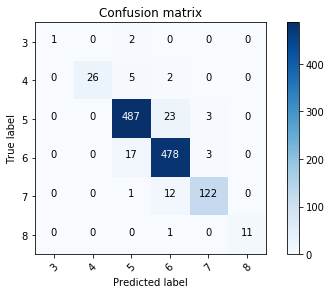

In [141]:
# make the predictions (y_hat) for the whole dataset
y_hat = knn_classifier.predict(X_pca_np)
# create the confusion matrix
cnf_matrix = confusion_matrix(rn_wine_y, y_hat)
# plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=np.unique(rn_wine_y))

## Verdict (TODO)
* Lorem Ipsum

## FUNCTIONS

In [12]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')